In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\buitr\Documents\04-2025 Instacart Basket Analysis'

In [4]:
all_data_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_data_merge.pkl'))

In [5]:
all_data_merge.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,...,add_to_cart_order,reordered,_merge,gender,state,age,date_joined,n_dependants,fam_status,income
0,195,196,Soda,77,7,9.0,0,0,2539329,1,...,1,0,both,Female,Alabama,31,2/17/2019,3,married,40423
1,195,196,Soda,77,7,9.0,1,1,2398795,1,...,1,1,both,Female,Alabama,31,2/17/2019,3,married,40423
2,195,196,Soda,77,7,9.0,2,2,473747,1,...,1,1,both,Female,Alabama,31,2/17/2019,3,married,40423
3,195,196,Soda,77,7,9.0,3,3,2254736,1,...,1,1,both,Female,Alabama,31,2/17/2019,3,married,40423
4,195,196,Soda,77,7,9.0,4,4,431534,1,...,1,1,both,Female,Alabama,31,2/17/2019,3,married,40423


<Axes: xlabel='orders_day_of_week'>

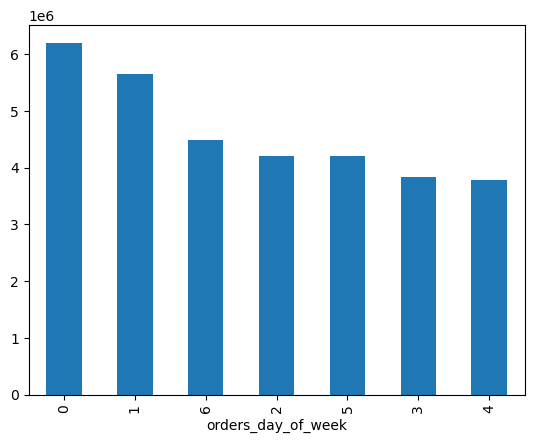

In [6]:
# bar chart 
all_data_merge['orders_day_of_week'].value_counts().plot.bar()

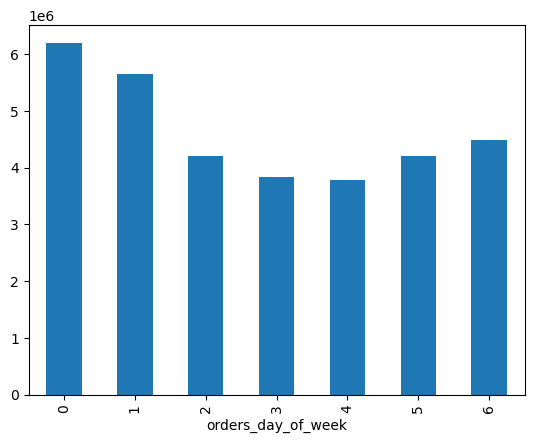

In [7]:
bar_orders_day_of_week = all_data_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

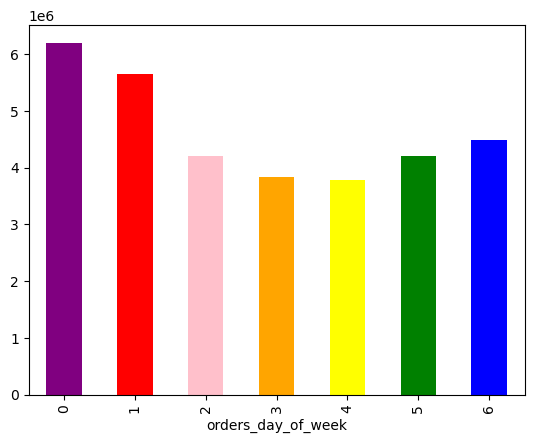

In [8]:
bar_orders_day_of_week = all_data_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

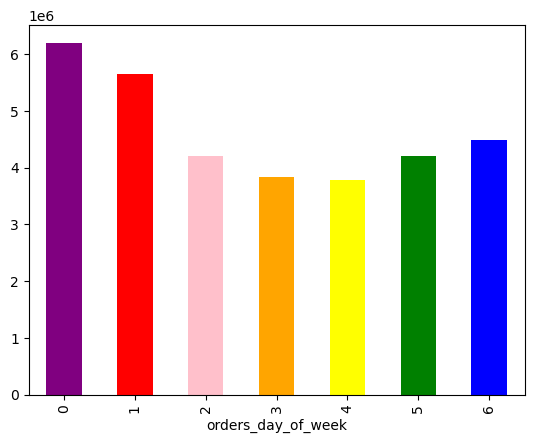

In [9]:
bar_orders_day_of_week.figure

In [10]:
bar_orders_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

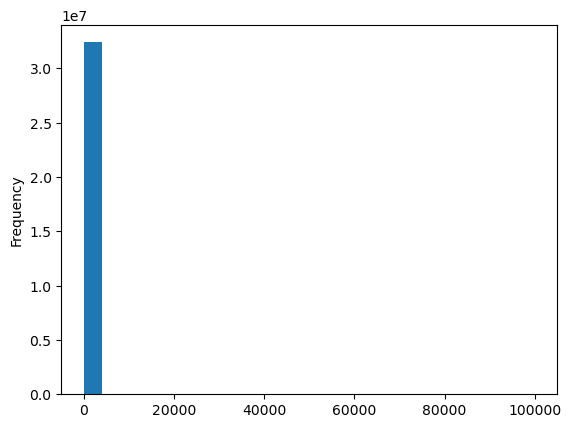

In [11]:
# Histograms

hist_prices_all_data_merge = all_data_merge['prices'].plot.hist(bins = 25)

In [12]:
all_data_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

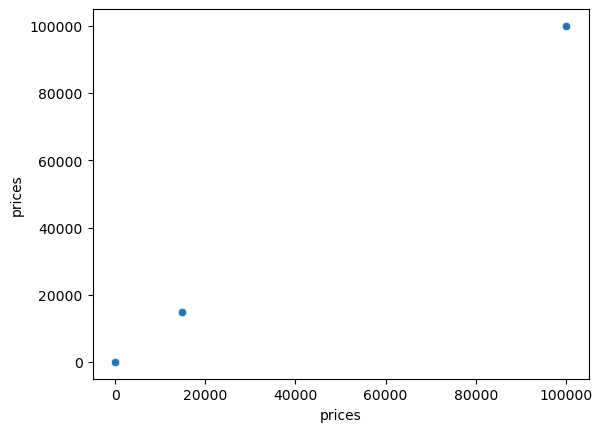

In [13]:
# scatterplot
scatterplot_prices_all_data_merge = sns.scatterplot(x = 'prices', y = 'prices', data = all_data_merge)

In [14]:
all_data_merge['prices'].max()

99999.0

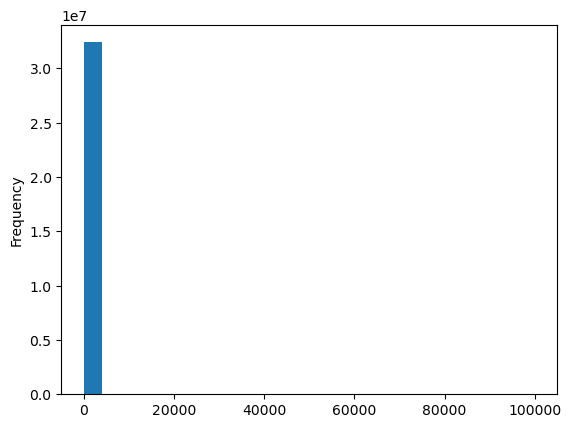

In [15]:
hist_prices = all_data_merge['prices'].plot.hist(bins=25)

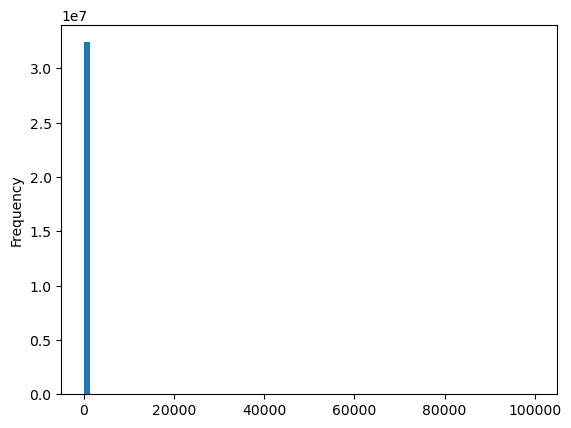

In [16]:
hist_prices_2 = all_data_merge['prices'].plot.hist(bins=70)

In [17]:
# create line charts with samples
np.random.seed(4)
dev = np.random.rand(len(all_data_merge)) <= 0.7


In [18]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
# store sample in dataframe big and small
big = all_data_merge[dev]
small = all_data_merge[~dev]

In [20]:
len(all_data_merge)

32404859

In [21]:
len(big) + len(small)

32404859

In [22]:
# reducing your samples to only those columns necessary for the line chart
df_orders_day_of_week_prices_small = small[['orders_day_of_week','prices']]


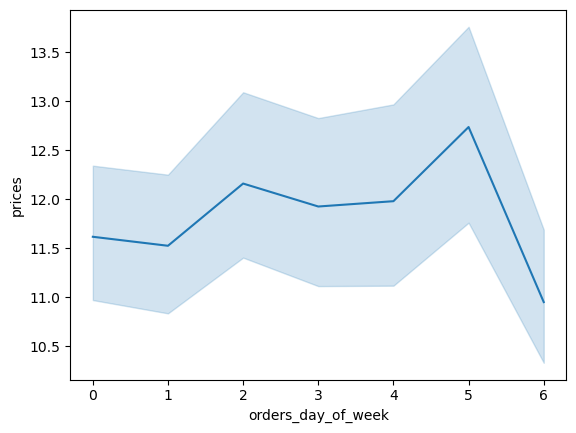

In [23]:
line_orders_day_of_week_prices = sns.lineplot(data = df_orders_day_of_week_prices_small, x = 'orders_day_of_week', y = 'prices')

In [24]:
# reducing samples to only order_hour_of_day columns 
order_hour_of_day_small = small['order_hour_of_day']

In [25]:
order_hour_of_day_small

0            8
2           12
3            7
6            9
10           7
            ..
32404841    13
32404842    17
32404843    11
32404849    12
32404850    10
Name: order_hour_of_day, Length: 9721098, dtype: int64

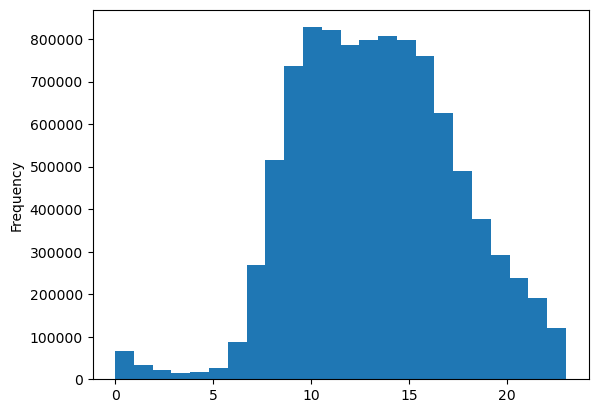

In [26]:
# 3. histogram of the “order_hour_of_day” column

hist_order_hour_of_day = order_hour_of_day_small.plot.hist(bins = 24)

In [27]:
# the histogram shows lowest order at night and the highest orders during office hours

In [28]:
# reducing  samples to only those columns necessary for the histogram
df_loyalty_flag_small = small[['loyalty_flag']]

KeyError: "None of [Index(['loyalty_flag'], dtype='object')] are in the [columns]"

In [ ]:
# 4. Create a bar chart from the “loyalty_flag” column

bar_loyalty_flag = df_loyalty_flag_small['loyalty_flag'].value_counts().plot.bar()

In [ ]:
# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
hourly_average_prices = small.groupby('order_hour_of_day')['prices'].mean().reset_index()

In [ ]:
# Rename for clarity
hourly_average_prices.columns = ['order_hour_of_day', 'avg_price']

In [ ]:
line_hourly_average_prices = sns.lineplot(data = hourly_average_prices, x = 'order_hour_of_day', y = 'avg_price')

In [ ]:
# 6. conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns
# determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents
df_age_fam_n_dependants = small[['age','n_dependants']]


In [ ]:
line_age_fam_n_dependants = sns.lineplot(data = df_age_fam_n_dependants, x = 'age', y = 'n_dependants')

In [ ]:
# 7. explore whether there’s a connection between age and spending power (income)
df_age_income = small[['age','income']]

In [ ]:
type(df_age_income)

In [ ]:
scatterplot_age_income = sns.scatterplot(data = df_age_income, x = 'age', y = 'income')

In [ ]:
# The scatterplot shows the lowest earners are unter 40 years old. From 40 earning increases significantly, with earning remains steady until 80

In [ ]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

In [ ]:
line_age_fam_n_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_fam_n_dependants.png'))

In [ ]:
line_hourly_average_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hourly_average_prices.png'))

In [ ]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [ ]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_small.png'))

In [ ]:
line_orders_day_of_week_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_day_of_week_prices.png'))

In [ ]:
hist_prices_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_2.png'))

In [ ]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [ ]:
scatterplot_prices_all_data_merge.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices_all_data_merge.png'))

In [ ]:
hist_prices_all_data_merge.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_all_data_merge.png'))

In [ ]:
bar_orders_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week.png'))